In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [359]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [361]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [362]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [363]:
num_var = df.columns[df.dtypes != 'object'].tolist()
num_var

['BHK', 'Rent', 'Size', 'Bathroom']

In [364]:
num_var.remove('Rent')

In [365]:
non_num_var = df.columns[df.dtypes=='object'].tolist()
non_num_var

['Posted On',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

#### EDA and Feature Engineering

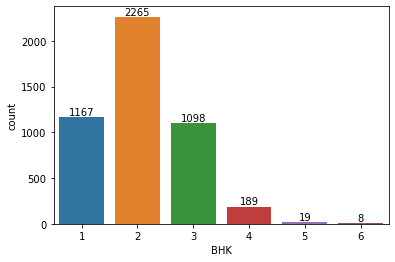

In [366]:
ax = sns.countplot(data=df, x = 'BHK')
for a in ax.patches:
    ax.annotate(f'{a.get_height()}', (a.get_x()+ a.get_width()/2, a.get_height()), ha='center', va = 'bottom')

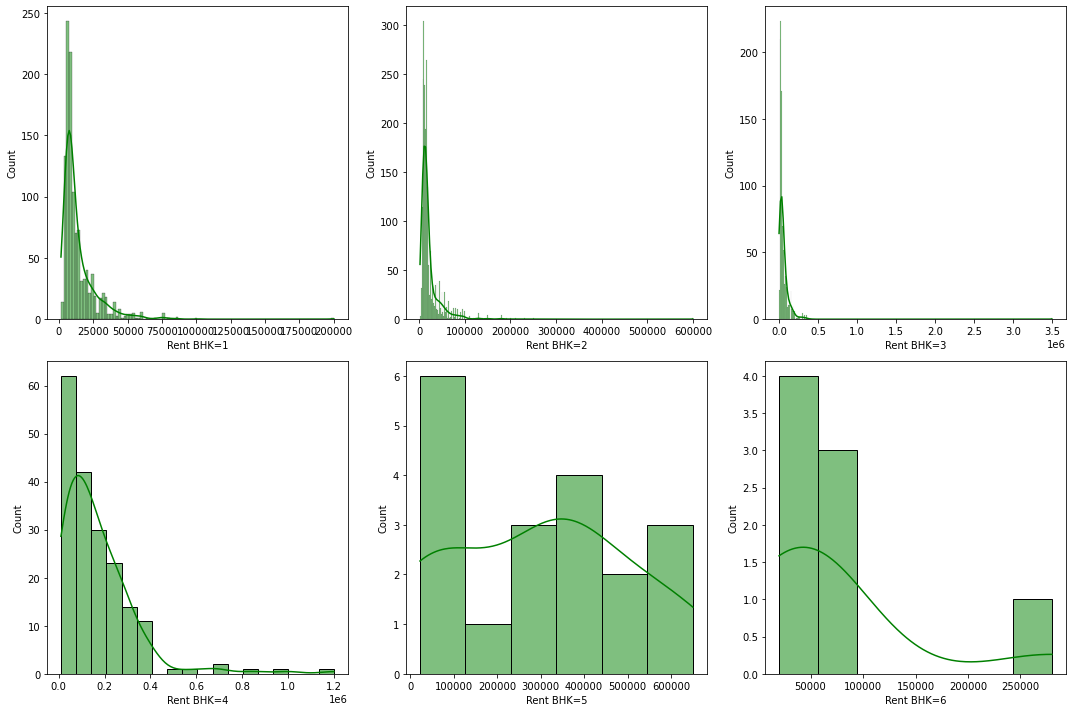

In [367]:
fig, axes = plt.subplots(nrows=2, ncols= 3, figsize=(15,10))

sns.histplot(data=df[df['BHK'] == 1], ax=axes[0, 0], x='Rent', kde=True, color='green')
axes[0,0].set(xlabel='Rent BHK=1')

sns.histplot(data=df[df['BHK'] == 2], ax=axes[0, 1], x='Rent', kde=True, color='green')
axes[0,1].set(xlabel='Rent BHK=2')

sns.histplot(data=df[df['BHK'] == 3], ax=axes[0, 2], x='Rent', kde=True, color='green')
axes[0,2].set(xlabel='Rent BHK=3')

sns.histplot(data=df[df['BHK'] == 4], ax=axes[1, 0], x='Rent', kde=True, color='green')
axes[1,0].set(xlabel='Rent BHK=4')

sns.histplot(data=df[df['BHK'] == 5], ax=axes[1, 1], x='Rent', kde=True, color='green')
axes[1,1].set(xlabel='Rent BHK=5')

sns.histplot(data=df[df['BHK'] == 6], ax=axes[1, 2], x='Rent', kde=True, color='green')
axes[1,2].set(xlabel='Rent BHK=6')

plt.tight_layout()

<AxesSubplot:xlabel='Size', ylabel='Count'>

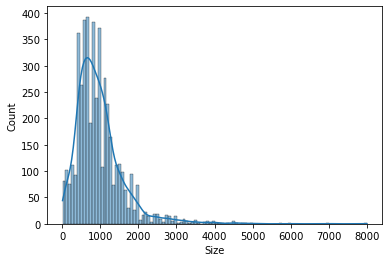

In [368]:
sns.histplot(data=df, x='Size', kde=True)


<AxesSubplot:xlabel='BHK', ylabel='Size'>

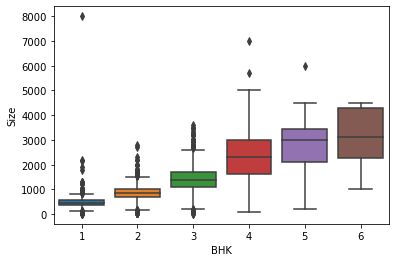

In [369]:
sns.boxplot(data=df, x='BHK', y='Size')


In [370]:
for BHK in [1,2,3]:
    size_values = df[df['BHK'] == BHK]['Size']
    q3 = size_values.quantile(0.75)
    q1 = size_values.quantile(0.25)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    size_values = size_values.apply(lambda x: x if x >= lower_limit else lower_limit)
    df.loc[df['BHK'] == BHK, 'Size'] = size_values

<AxesSubplot:xlabel='BHK', ylabel='Size'>

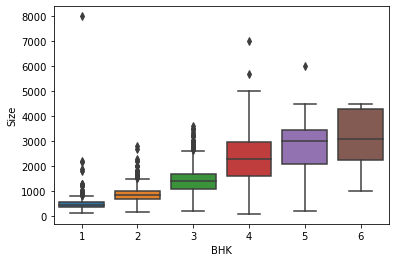

In [371]:
sns.boxplot(data=df, x='BHK', y='Size')


In [372]:
df[df['Size']==8000]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4185,2022-06-06,1,200000,8000,Ground out of 4,Super Area,"Beeramguda, Ramachandra Puram, NH 9",Hyderabad,Unfurnished,Bachelors/Family,10,Contact Owner


In [373]:
df.drop(4185, axis=0, inplace = True)

In [374]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [375]:
def modify_floor(x):
    x = x.replace('Ground', '0')
    x = x.replace('Upper Basement', '-1')
    x = x.replace('Lower Basement', '-2')
    return x

In [376]:
df_Temp = df

In [377]:
df_Temp['Floor'] = df_Temp['Floor'].apply(lambda x: modify_floor(x))

In [378]:
df_Temp = df_Temp['Floor'].str.split(' out of ', expand = True).rename(columns={0:'Floor', 1:'Total Floors'})

In [379]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [380]:
df['Floor'] = df_Temp['Floor']
df['Total Floors'] = df_Temp['Total Floors']

In [381]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [382]:
df['Total Floors'].isna().sum()

4

In [383]:
df.dropna(inplace = True)

In [384]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


[Text(0, 0, '2443'), Text(0, 0, '2296'), Text(0, 0, '2')]

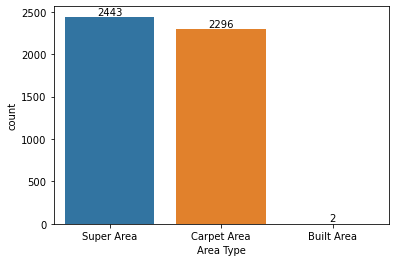

In [385]:
fig, ax = plt.subplots()
sns.countplot(data = df, x='Area Type', ax=ax)
ax.bar_label(ax.containers[0])

In [386]:
df['Area Locality'].nunique()

2232

In [387]:
df['Area Locality'].value_counts().to_frame().rename(columns={'Area Locality':"Occurences"})

,Occurences
Bandra West,37
Gachibowli,29
Electronic City,24
"Miyapur, NH 9",22
Velachery,22
...,...
Serenity Complex,1
Charkop Sector 6,1
"Hiranandani Gardens Odyssey I, Hiranandani Gardens",1
in Mahim West,1


In [388]:
df.drop(['Area Locality'], inplace = True, axis = 1)

In [389]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


[Text(0, 0, '524'),
 Text(0, 0, '972'),
 Text(0, 0, '886'),
 Text(0, 0, '603'),
 Text(0, 0, '891'),
 Text(0, 0, '865')]

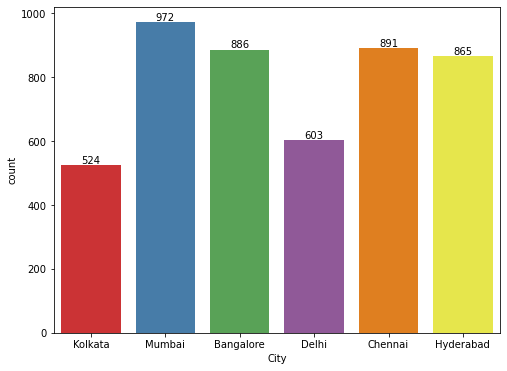

In [390]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.countplot(data=df, x='City', palette='Set1')
ax.bar_label(ax.containers[0])

<Figure size 576x432 with 0 Axes>

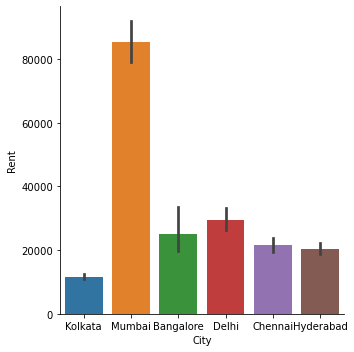

In [391]:
plt.figure(figsize=(8, 6))
sns.catplot(kind='bar', data=df, x='City', y='Rent')
plt.show()

<Figure size 576x432 with 0 Axes>

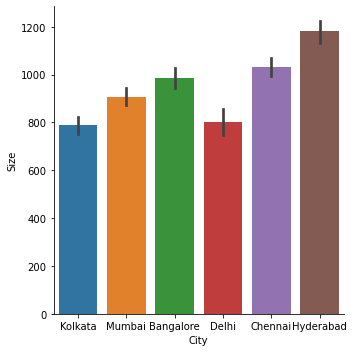

In [392]:
plt.figure(figsize=(8, 6))
sns.catplot(kind='bar', data=df, x='City', y='Size')
plt.show()

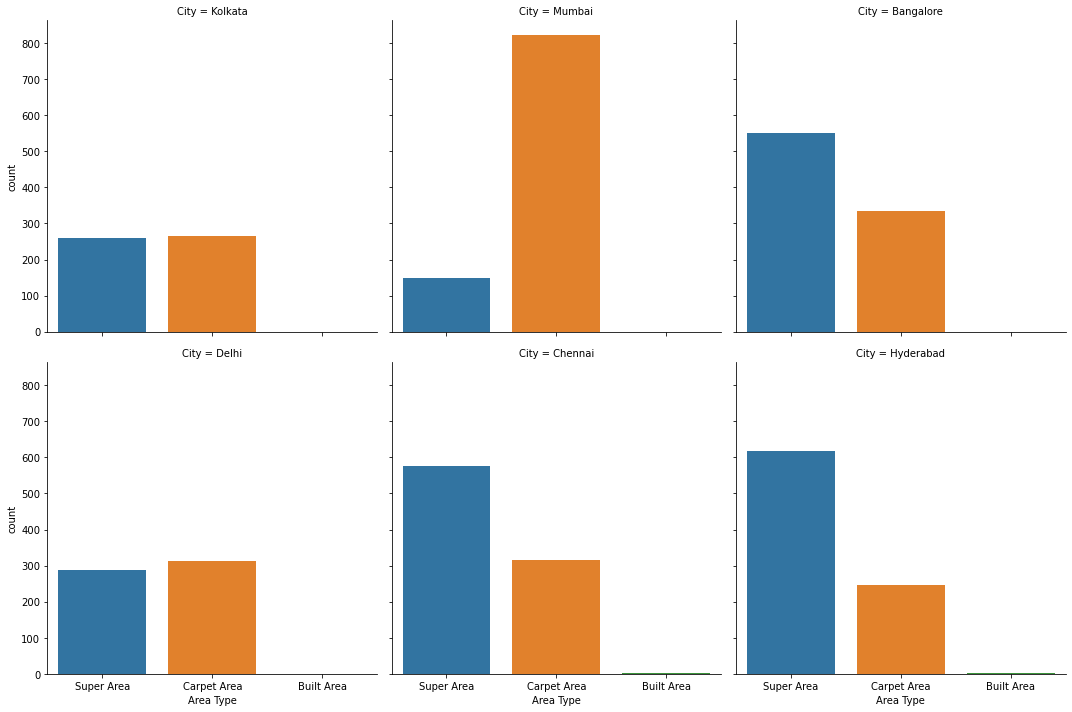

In [393]:

sns.catplot(kind='count', data=df, x='Area Type', col = 'City', col_wrap=3)


[Text(0, 0, '1813'), Text(0, 0, '2250'), Text(0, 0, '678')]

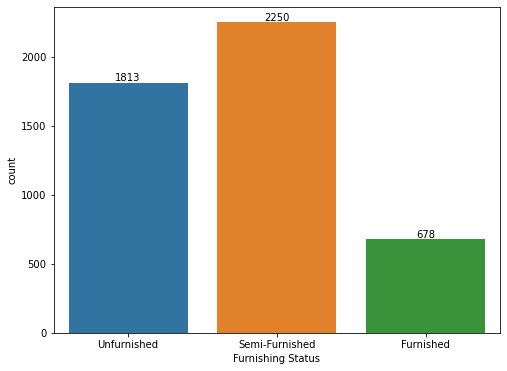

In [394]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.countplot(data=df, x='Furnishing Status')
ax.bar_label(ax.containers[0])

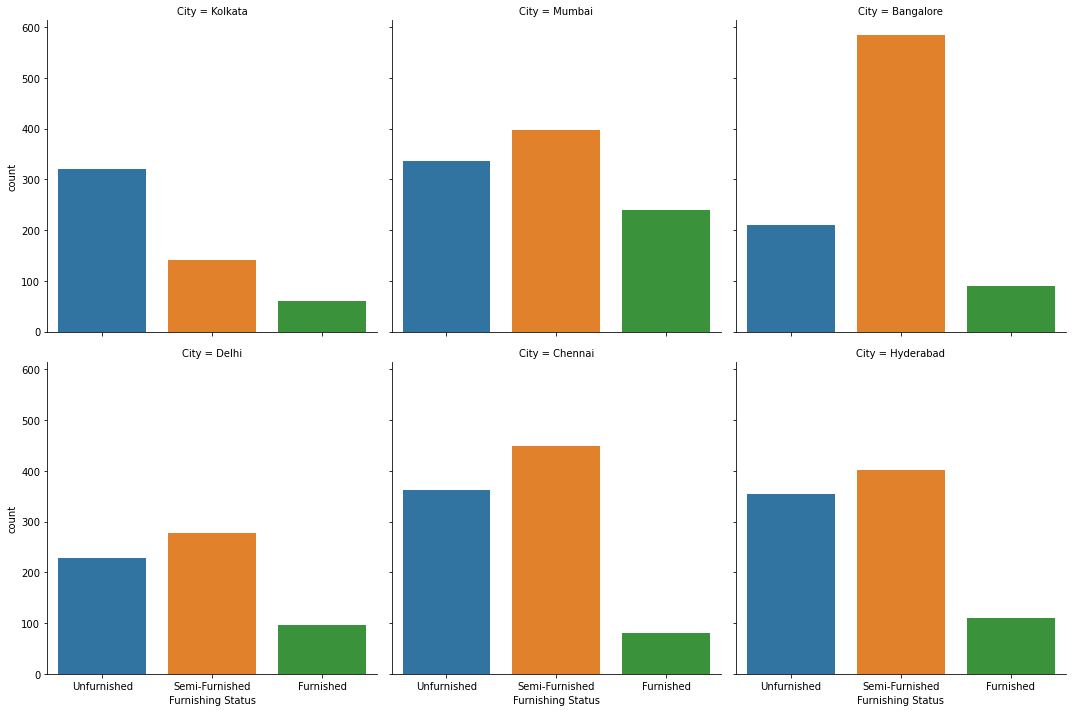

In [395]:
sns.catplot(kind='count', data=df, x='Furnishing Status', col = 'City', col_wrap=3)


<Figure size 576x432 with 0 Axes>

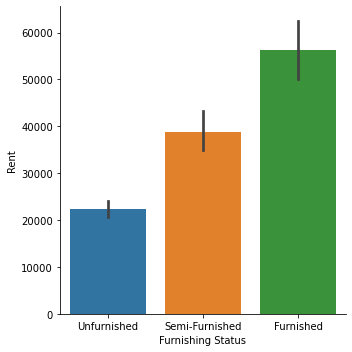

In [396]:
plt.figure(figsize=(8, 6))
sns.catplot(kind='bar', data=df, x='Furnishing Status', y='Rent')
plt.show()

In [397]:
df['Tenant Preferred'].value_counts()


Bachelors/Family    3440
Bachelors            830
Family               471
Name: Tenant Preferred, dtype: int64

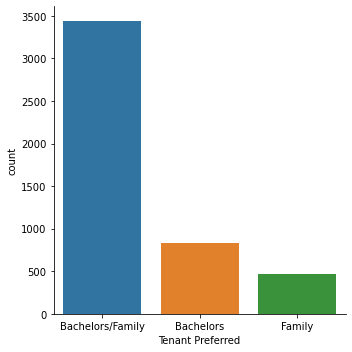

In [398]:
sns.catplot(kind='count', data=df, x='Tenant Preferred')

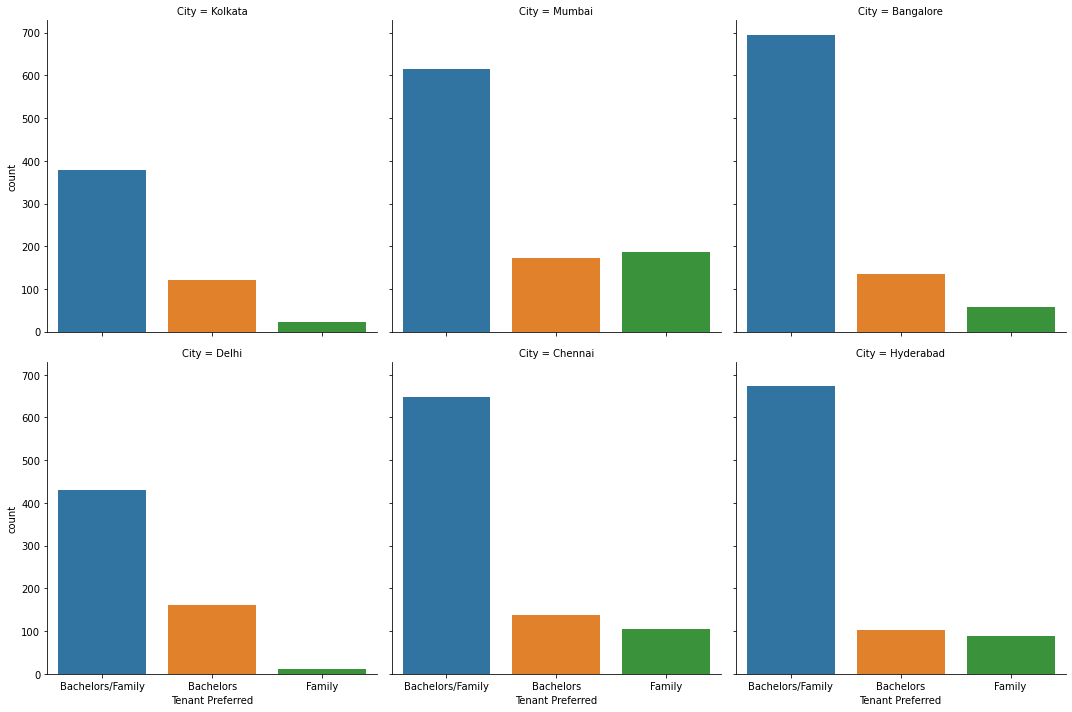

In [399]:
sns.catplot(kind='count', data=df, x='Tenant Preferred', col='City', col_wrap=3)

In [400]:
df['Bathroom'].value_counts()

2    2290
1    1472
3     748
4     156
5      60
6      12
7       3
Name: Bathroom, dtype: int64

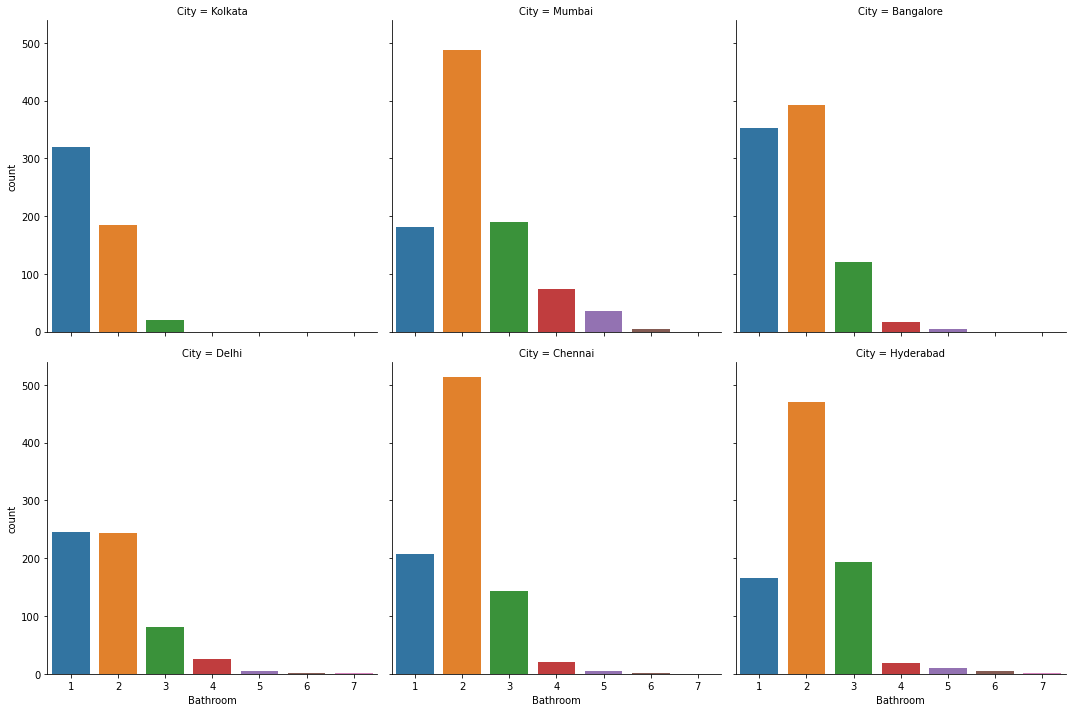

In [401]:
sns.catplot(data=df, kind='count', x='Bathroom', col='City', col_wrap=3)

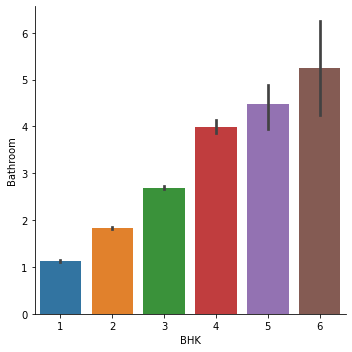

In [402]:
sns.catplot(data=df, kind='bar', x='BHK', y='Bathroom')

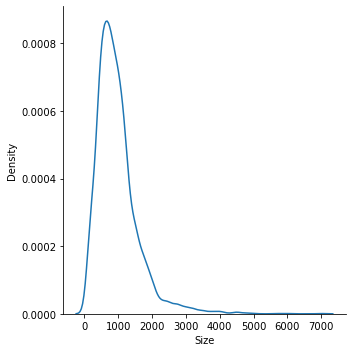

In [403]:
sns.displot(kind='kde', data = df, x = "Size")

In [404]:
df['Size_log'] = df['Size'].apply(lambda x: np.log(x+1))

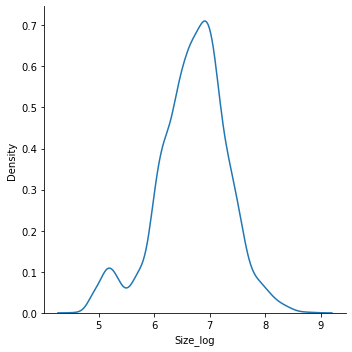

In [405]:
sns.displot(kind='kde', data=df, x='Size_log')

In [406]:
df.drop('Size', inplace=True, axis=1)

In [407]:
df.drop('Posted On', inplace=True, axis=1)


In [408]:
df.drop('Point of Contact', inplace=True, axis=1)

In [409]:
df.head()

,BHK,Rent,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Total Floors,Size_log
0,2,10000,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,2,7.003974
1,2,20000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,3,6.685861
2,2,17000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,3,6.908755
3,2,10000,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,2,6.685861
4,2,7500,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,2,6.746412


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4741 non-null   int64  
 1   Rent               4741 non-null   int64  
 2   Floor              4741 non-null   object 
 3   Area Type          4741 non-null   object 
 4   City               4741 non-null   object 
 5   Furnishing Status  4741 non-null   object 
 6   Tenant Preferred   4741 non-null   object 
 7   Bathroom           4741 non-null   int64  
 8   Total Floors       4741 non-null   object 
 9   Size_log           4741 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 536.5+ KB


In [411]:
df['Floor'] = df['Floor'].astype(int)

In [412]:
df['Total Floors'] = df['Total Floors'].astype(int)

In [413]:
df.head()

,BHK,Rent,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Total Floors,Size_log
0,2,10000,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,2,7.003974
1,2,20000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,3,6.685861
2,2,17000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,3,6.908755
3,2,10000,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,2,6.685861
4,2,7500,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,2,6.746412


In [414]:
df = pd.get_dummies(df)

In [415]:
df.head()

,BHK,Rent,Floor,Bathroom,Total Floors,Size_log,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,0,2,2,7.003974,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,2,20000,1,1,3,6.685861,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,2,17000,1,1,3,6.908755,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,2,10000,1,1,2,6.685861,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,2,7500,1,1,2,6.746412,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0


In [416]:
from sklearn.model_selection import train_test_split
X = df.drop('Rent', axis=1)
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [417]:
X_train.shape, X_test.shape

((3792, 20), (949, 20))

In [418]:
df['Size_log'].describe()

count    4741.000000
mean        6.691855
std         0.630815
min         4.615121
25%         6.311735
50%         6.746412
75%         7.090910
max         8.853808
Name: Size_log, dtype: float64

In [419]:
df.head()

,BHK,Rent,Floor,Bathroom,Total Floors,Size_log,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,0,2,2,7.003974,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,2,20000,1,1,3,6.685861,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,2,17000,1,1,3,6.908755,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,2,10000,1,1,2,6.685861,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,2,7500,1,1,2,6.746412,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0


In [420]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [446]:
X_train=scaler.fit_transform(X_train)

In [448]:
X_train

array([[-0.10704782, -0.42771707,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [ 1.09037206, -0.60116409,  1.17443178, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 1.09037206,  0.092624  ,  1.17443178, ..., -0.45567896,
         0.61637056, -0.33954988],
       ...,
       [-0.10704782,  0.43951805,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [ 1.09037206, -0.60116409,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [-1.3044677 ,  0.95985913, -1.09599662, ..., -0.45567896,
         0.61637056, -0.33954988]])

In [449]:
X_test=scaler.transform(X_test)

In [451]:
X_test

array([[-1.3044677 ,  3.04122342, -1.09599662, ...,  2.19452749,
        -1.62240066, -0.33954988],
       [ 1.09037206, -0.60116409,  0.03921758, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 3.48521181,  1.30675318,  2.30964599, ..., -0.45567896,
        -1.62240066,  2.94507545],
       ...,
       [ 1.09037206,  0.092624  ,  1.17443178, ..., -0.45567896,
         0.61637056, -0.33954988],
       [-0.10704782, -0.25427004,  0.03921758, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 1.09037206, -0.60116409,  0.03921758, ...,  2.19452749,
        -1.62240066, -0.33954988]])

In [452]:
import pickle
pickle.dump(scaler,open('scaled.pkl','wb'))

In [453]:
X_train

array([[-0.10704782, -0.42771707,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [ 1.09037206, -0.60116409,  1.17443178, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 1.09037206,  0.092624  ,  1.17443178, ..., -0.45567896,
         0.61637056, -0.33954988],
       ...,
       [-0.10704782,  0.43951805,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [ 1.09037206, -0.60116409,  0.03921758, ..., -0.45567896,
         0.61637056, -0.33954988],
       [-1.3044677 ,  0.95985913, -1.09599662, ..., -0.45567896,
         0.61637056, -0.33954988]])

In [454]:
X_test

array([[-1.3044677 ,  3.04122342, -1.09599662, ...,  2.19452749,
        -1.62240066, -0.33954988],
       [ 1.09037206, -0.60116409,  0.03921758, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 3.48521181,  1.30675318,  2.30964599, ..., -0.45567896,
        -1.62240066,  2.94507545],
       ...,
       [ 1.09037206,  0.092624  ,  1.17443178, ..., -0.45567896,
         0.61637056, -0.33954988],
       [-0.10704782, -0.25427004,  0.03921758, ..., -0.45567896,
        -1.62240066,  2.94507545],
       [ 1.09037206, -0.60116409,  0.03921758, ...,  2.19452749,
        -1.62240066, -0.33954988]])

In [455]:
from sklearn.ensemble import RandomForestRegressor

In [456]:
model = RandomForestRegressor(n_estimators=300, max_depth=60, min_samples_leaf=5, min_samples_split=5, random_state=42)

In [457]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=300, random_state=42)

In [458]:
y_pred = model.predict(X_test)

In [459]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.70888806430804

In [460]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

10737.139524982837

In [527]:
m=scaler.transform(a.reshape(1,-1))

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [528]:
s= model.predict(scaler.transform(a.reshape(1,-1)))

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [529]:
s

array([88716.69802379])

In [514]:
scaler.inverse_transform(b2)

array([[ 1.        , 21.        ,  1.        , 23.        , -1.19667278,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ]])

In [530]:
import pickle
pickle.dump(model, open('RFReg.pkl','wb'))